# Dataset
https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [27]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


In [8]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [11]:
target = "EP"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target])
                , drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.000098, test: 0.000099
R2: train: 0.929893, test: 0.929444


In [19]:
a = np.random.randint(-9, 9, (4, 3))
a

array([[ 0,  4,  7],
       [-7,  2,  2],
       [ 8, -4,  5],
       [ 2,  5, -4]])

In [21]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
pd.DataFrame(poly.fit_transform(a))

,0,1,2,3,4,5,6,7,8
0,0.0,4.0,7.0,0.0,0.0,0.0,16.0,28.0,49.0
1,-7.0,2.0,2.0,49.0,-14.0,-14.0,4.0,4.0,4.0
2,8.0,-4.0,5.0,64.0,-32.0,40.0,16.0,-20.0,25.0
3,2.0,5.0,-4.0,4.0,10.0,-8.0,25.0,-20.0,16.0


In [22]:
target = "EP"
y = np.log(df[target].values)
X = pd.get_dummies(df.drop(columns=[target])
                , drop_first=True).values

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("MSE: train: %f, test: %f" % (train_mse, test_mse))
print("R2: train: %f, test: %f" % (train_r2, test_r2))


MSE: train: 0.000088, test: 0.000088
R2: train: 0.937139, test: 0.936919


In [25]:
a = np.random.randint(-9, 9, (4, 200))
poly.fit_transform(a).shape

(4, 20300)

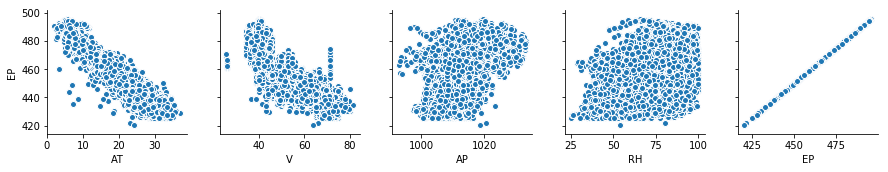

In [31]:
sns.pairplot(df, x_vars=df.columns, y_vars=["EP"])